In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from behavelet import wavelet_transform
from sklearn.decomposition import PCA 

C:\Users\Haha\anaconda3\lib\site-packages\behavelet\morlet.py:26: UserWarning: CuPy was not found, so GPU functionality is unavailable. See https://github.com/cupy/cupy#installation for installation instructions
  warnings.warn('CuPy was not found, so GPU functionality is unavailable. '


In [9]:
# params definition
beh_labels = ["resting", "walking", "anterior_grooming", "abdominal_grooming", "antennal_grooming", "hindleg_grooming", "foreleg_grooming", "eye_grooming"]

# useful functions
# extract columns with label containing specified string: e.g. labels with 'angle' and with 'Femur'
beh_df.filter(regex="angle").filter(regex="Femur")

# extract rows with the desired condition: e.g. rows where column 'Manual' has the label 'resting'
beh_df.loc[beh_df['Manual'] == 'resting']

t           twop_index  \
Date   Genotype Fly Trial Frame                                    
210301 J1xCI9   1   0     0        0.005133 -9223372036854775808   
                          1        0.015100 -9223372036854775808   
                          2        0.025100 -9223372036854775808   
                          3        0.035100 -9223372036854775808   
                          4        0.045100 -9223372036854775808   
...                                     ...                  ...   
                    11    24996  249.811200                 4027   
                          24997  249.821200                 4027   
                          24998  249.831200                 4028   
                          24999  249.841200                 4028   
                          25000  249.851200                 4028   

                                 angle_RF_leg_Coxa_yaw  angle_RF_leg_Coxa  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0                   0.288564           0.406265   
                          1                   0.288564           0.406265   
                          2                   0.358618           0.451284   
                          3                   0.358618           0.451284   
                          4                   0.358618           0.451284   
...                                                ...                ...   
                    11    24996               0.358769           0.444905   
                          24997               0.358769           0.444905   
                          24998               0.358769           0.444905   
                          24999               0.358769           0.444905   
                          25000               0.463316           0.321715   

                                 angle_RF_leg_Coxa_roll  angle_RF_leg_Femur  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0                   -0.484703           -2.437838   
                          1                   -0.501312           -2.448196   
                          2                   -0.489070           -2.514260   
                          3                   -0.514999           -2.504808   
                          4                   -0.497719           -2.494613   
...                                                 ...                 ...   
                    11    24996               -0.588455           -2.641766   
                          24997               -0.588455           -2.641766   
                          24998               -0.711193           -2.702261   
                          24999               -0.709644           -2.775586   
                          25000               -0.672378           -2.873647   

                                 angle_RF_leg_Tibia  angle_RF_leg_Femur_roll  \
Date   Genotype Fly Trial Frame                                                
210301 J1xCI9   1   0     0                2.119772                -0.070825   
                          1                2.097349                -0.089947   
                          2                2.128461                -0.030327   
                          3                2.093834                -0.056415   
                          4                2.116635                -0.038385   
...                                             ...                      ...   
                    11    24996            2.293752                -0.034689   
                          24997            2.372344                -0.035799   
                          24998            2.364601                -0.058636   
                          24999            2.275548                -0.148496   
                          25000            2.056403                -0.386615   

                                 angle_RF_leg_Tarsus  angle_RM_leg_Coxa_yaw  \
Date   

In [ ]:
# NOT USED ANYMORE
# return indices of samples for each behaviour type
def split_indices_per_label(y, label_list):
    indicies_per_label = [[] for x in np.arange(len(label_list))]
    
    # loop over the labels
    for i in np.arange(len(beh_labels)): 
        indicies_per_label[i] = np.where(y["Manual"] == label_list[i])
    return indicies_per_label

# Loading the behavioural/neural data

In [2]:
beh_data_dir = "data/COBAR_behaviour_incl_manual.pkl"
beh_df = pd.read_pickle(beh_data_dir)
beh_df

t           twop_index  \
Date   Genotype Fly Trial Frame                                    
210301 J1xCI9   1   0     0        0.005133 -9223372036854775808   
                          1        0.015100 -9223372036854775808   
                          2        0.025100 -9223372036854775808   
                          3        0.035100 -9223372036854775808   
                          4        0.045100 -9223372036854775808   
...                                     ...                  ...   
                    11    25195  251.800000 -9223372036854775808   
                          25196  251.809967 -9223372036854775808   
                          25197  251.819967 -9223372036854775808   
                          25198  251.829967 -9223372036854775808   
                          25199  251.839967 -9223372036854775808   

                                 angle_RF_leg_Coxa_yaw  angle_RF_leg_Coxa  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0                   0.288564           0.406265   
                          1                   0.288564           0.406265   
                          2                   0.358618           0.451284   
                          3                   0.358618           0.451284   
                          4                   0.358618           0.451284   
...                                                ...                ...   
                    11    25195               0.358769           0.444905   
                          25196               0.353103           0.469299   
                          25197               0.353103           0.469299   
                          25198               0.353103           0.469299   
                          25199               0.245832           0.504851   

                                 angle_RF_leg_Coxa_roll  angle_RF_leg_Femur  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0                   -0.484703           -2.437838   
                          1                   -0.501312           -2.448196   
                          2                   -0.489070           -2.514260   
                          3                   -0.514999           -2.504808   
                          4                   -0.497719           -2.494613   
...                                                 ...                 ...   
                    11    25195               -0.703572           -2.578151   
                          25196               -0.713546           -2.601049   
                          25197               -0.713546           -2.601049   
                          25198               -0.743495           -2.590083   
                          25199               -0.739525           -2.634876   

                                 angle_RF_leg_Tibia  angle_RF_leg_Femur_roll  \
Date   Genotype Fly Trial Frame                                                
210301 J1xCI9   1   0     0                2.119772                -0.070825   
                          1                2.097349                -0.089947   
                          2                2.128461                -0.030327   
                          3                2.093834                -0.056415   
                          4                2.116635                -0.038385   
...                                             ...                      ...   
                    11    25195            2.220802                -0.021502   
                          25196            2.245679                -0.019357   
                          25197            2.298148                -0.020857   
                          25198            2.235951                -0.029271   
                          25199            2.185196                -0.055439   

                                 angle_RF_leg_Tarsus  angle_RM_leg_Coxa_yaw  \
Date   

In [94]:
neural_data_dir = beh_data_dir = "data/COBAR_neural.pkl"
neural_df = pd.read_pickle(neural_data_dir)
neural_df

t     neuron_0    neuron_1  \
Date   Genotype Fly Trial Frame                                        
210301 J1xCI9   1   0     0        1.846767   886.468822  539.078854   
                          1        1.908333   904.990346  549.142576   
                          2        1.969900   951.343444  495.389359   
                          3        2.031467   919.118001  488.734655   
                          4        2.093000   811.207176  598.854688   
...                                     ...          ...         ...   
                    11    4035   250.257500  1091.733025  229.036370   
                          4036   250.319067  1083.689512  224.277678   
                          4037   250.380600  1016.800708  263.032693   
                          4038   250.442167  1100.966747  217.181669   
                          4039   250.503733  1127.533714  211.338355   

                                    neuron_2     neuron_3     neuron_4  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0       648.448219   659.934798   960.886917   
                          1       641.978012   673.451323   959.120909   
                          2       667.900427   647.023920   922.999666   
                          3       627.207506   669.359604   967.324279   
                          4       598.844883   614.788711   927.682820   
...                                      ...          ...          ...   
                    11    4035   1673.098351  2788.830860  1832.827041   
                          4036   1626.795243  2803.103042  1869.423843   
                          4037   1624.789506  2755.284855  1924.012693   
                          4038   1569.018839  2890.244587  1921.096732   
                          4039   1718.190280  2731.183736  2022.781228   

                                    neuron_5     neuron_6     neuron_7  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0      1087.578005  1264.055465   689.275322   
                          1      1033.622170  1293.954485   647.848768   
                          2      1035.334534  1298.692514   668.630966   
                          3      1081.832837  1320.492280   697.383989   
                          4      1015.316407  1274.834253   679.311958   
...                                      ...          ...          ...   
                    11    4035   1548.782680  1388.706244  2238.306798   
                          4036   1675.233107  1604.436872  2281.367960   
                          4037   1810.982975  1496.055076  2359.644688   
                          4038   1735.650159  1389.671633  2330.835800   
                          4039   1826.932777  1474.406872  2223.860182   

                                    neuron_8  ...   neuron_113   neuron_114  \
Date   Genotype Fly Trial Frame               ...                             
210301 J1xCI9   1   0     0      1297.684359  ...  1434.945788  1039.457277   
                          1      1253.930092  ...  1432.954386  1032.438934   
                          2      1285.729967  ...  1358.161531   974.769252   
                          3      1255.667939  ...  1386.650784  1004.453438   
                          4      1241.864999  ...  1352.036969   972.731774   
...                                      ...  ...          ...          ...   
                    11    4035   2029.408911  ...   887.114691  1734.396430   
                          4036   2128.465504  ...  1002.946415  1733.634185   
                          4037   2044.958695  ...  1064.565073  1804.522860   
                          4038   2068.464632  ...  1058.037690  1807.967783   
                          4039   1991.379295  ...  1080.679242  1871.425640   

                                  neuron_115   neuron_116  neuron_117  \
Date   Genotype Fly Trial Frame                                         
21030

 # WEEK 8 : Familiarisation with data, plotting

## Part 1 : Plotting the data

### 1. Plot time traces of individual neurons across multiple trials

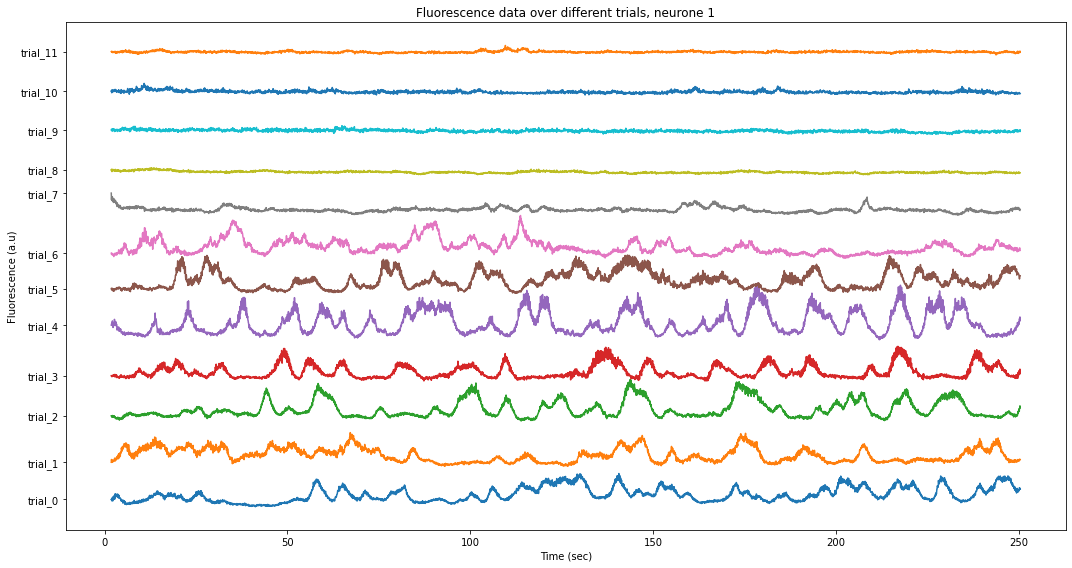

In [14]:
#neural_signals_trial_5 = neural_data[neural_data.index.get_level_values("Trial")==5]
neural_signals_neuron_1 = neural_df["neuron_1"]

# We construct a 3x3 matrix whose elements will be subplots depending on the column and row number they span
fig, ax1 = plt.subplots(figsize = (15,8))

ytick = []
for i in np.arange(12):   
    neural_signals_neuron_1_trial_i = neural_signals_neuron_1[neural_df.index.get_level_values("Trial")==i]
    #ax1.plot(neural_df["t"].iloc[:380], i*1500 + neural_signals_neuron_1_trial_i.iloc[:380], label = 'trial_' + str(i))
    ax1.plot(neural_df["t"].iloc[:4039], i*1500 + neural_signals_neuron_1_trial_i.iloc[:4039], label = 'trial_' + str(i))
    ytick.append(neural_signals_neuron_1_trial_i.iloc[0] + i*1500)
    
ax1.set_ylabel('Fluorescence (a.u)')
ax1.set_xlabel('Time (sec)')
ax1.set_title('Fluorescence data over different trials, neurone 1')

ax1.set_yticks(np.array(ytick))
neuron_names = ['trial_' + str(i) for i in range(12)]
ax1.set_yticklabels(neuron_names)


plt.tight_layout()
plt.show()
fig.savefig('report_images/w8_fluo_neurone1.png')

### 2. Plot time traces of individual angles/joints across multiple trials 

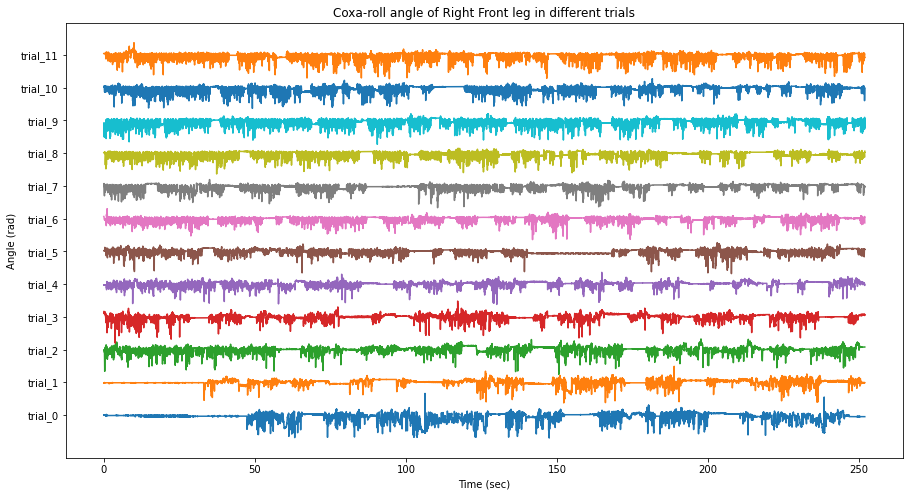

In [15]:
#Coxa-roll angle of Right Front leg in different trials

angle_RF_leg_roll = beh_df["angle_RF_leg_Coxa_roll"]
time = beh_df["t"]

fig, ax = plt.subplots(figsize = (15,8))
ytick = []

for i in range(12):
    y = angle_RF_leg_roll[angle_RF_leg_roll.index.get_level_values("Trial")==i]+3*i
    t=time[time.index.get_level_values("Trial")==i]
    plt.plot(t, y, alpha = 1) 
    ytick.append(angle_RF_leg_roll.iloc[0] + i*3)

ax.set_yticks(np.array(ytick))
trial_names = ['trial_' + str(i) for i in range(12)]
ax.set_yticklabels(trial_names)
ax.set_ylabel('Angle (rad)')
ax.set_xlabel('Time (sec)')
ax.set_title('Coxa-roll angle of Right Front leg in different trials')
plt.show()
fig.savefig('report_images/w8_Coxa-roll.png')

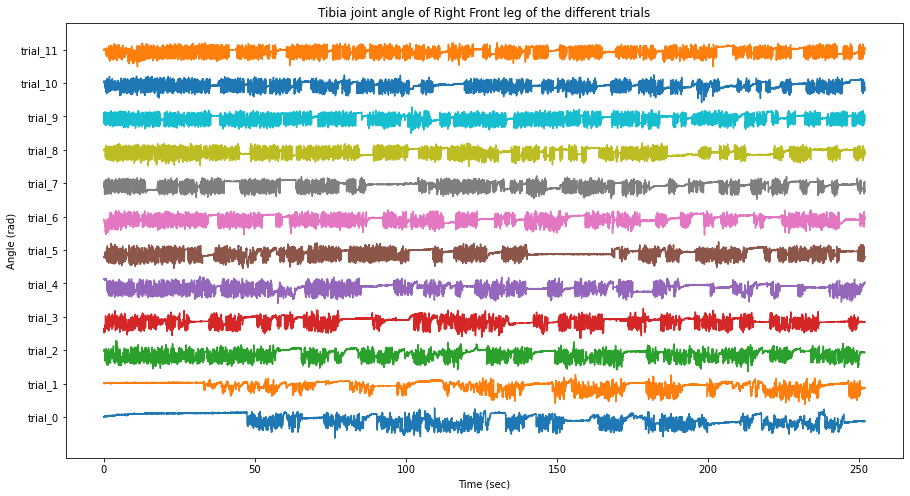

In [16]:
#Tibia joint angle of Right Front leg of the different trials
angle_RF_leg_Tibia = beh_df["angle_RF_leg_Tibia"]
time = beh_df["t"]

fig, ax = plt.subplots(figsize = (15,8))
ytick = []

for i in range(12):
    y = angle_RF_leg_Tibia[angle_RF_leg_Tibia.index.get_level_values("Trial")==i]+3*i
    t=time[time.index.get_level_values("Trial")==i]
    plt.plot(t, y, alpha = 1) 
    ytick.append(angle_RF_leg_Tibia.iloc[0] + i*3)

ax.set_yticks(np.array(ytick))
trial_names = ['trial_' + str(i) for i in range(12)]
ax.set_yticklabels(trial_names)
ax.set_ylabel('Angle (rad)')
ax.set_xlabel('Time (sec)')
ax.set_title('Tibia joint angle of Right Front leg of the different trials')
plt.show()
fig.savefig('report_images/w8_Tibia.png')

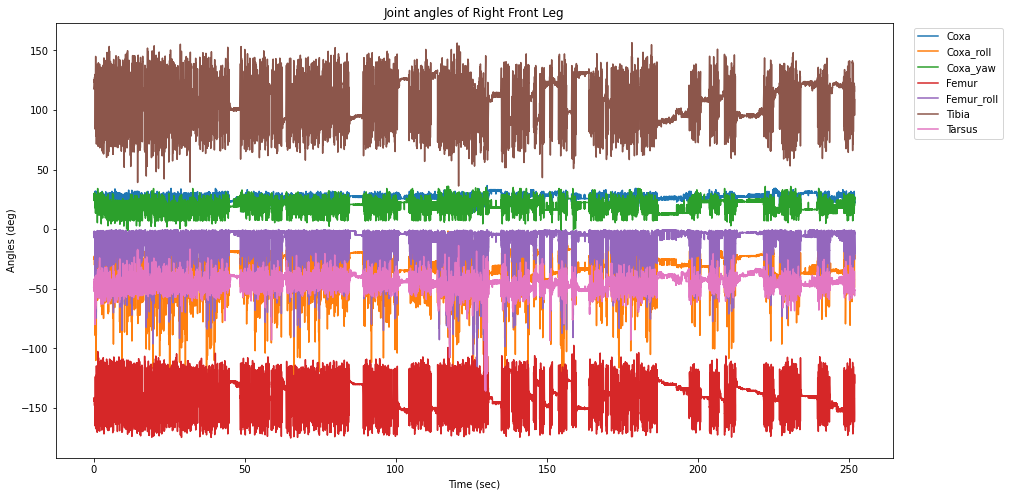

In [17]:
#plot of Joint angles of Right Front Leg

fig, ax2 = plt.subplots(figsize = (15,8))

beh_signals_trial_8 = beh_df[beh_df.index.get_level_values("Trial")==8]
joints = ['Coxa', 'Coxa_roll', 'Coxa_yaw', 'Femur', 'Femur_roll', 'Tibia', 'Tarsus']
leg_joints = ['angle_RF_leg_' + joint for joint in joints]

for i, joint in enumerate(leg_joints):   
    plt.plot(beh_signals_trial_8['t'], beh_signals_trial_8[joint]*180/np.pi, label = joints[i])

ax2.set_title('Joint angles of Right Front Leg')
ax2.set_ylabel('Angles (deg)')
ax2.set_xlabel('Time (sec)')
ax2.legend(bbox_to_anchor = (1.02,1))
fig.savefig('report_images/w8_all_joint.png')

## Part 2: Data pre-processing

### 1. ΔF/F

### 2. Noise reduction

# Week 9: part 2

[0.19228473 0.16808446]
(302400, 2)


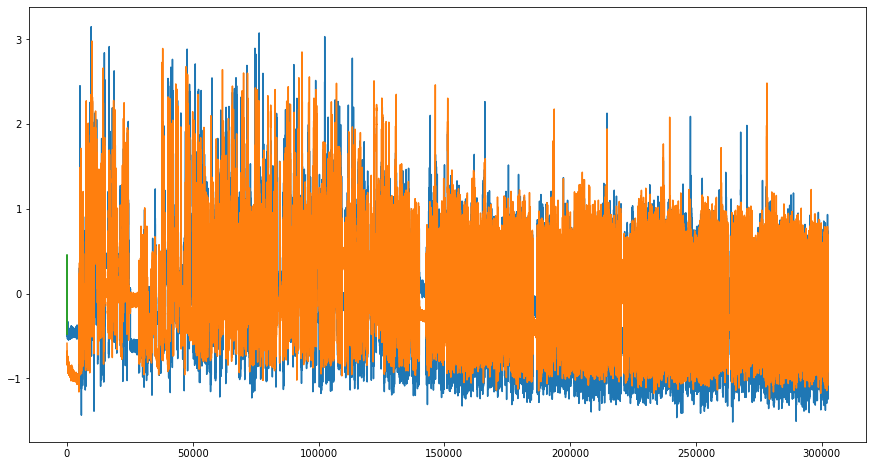

In [18]:
#PCA with all trials
#time as samples and pose/joint angles as features.
from sklearn.decomposition import PCA 
joints = ['Coxa', 'Coxa_roll', 'Coxa_yaw', 'Femur', 'Femur_roll', 'Tibia', 'Tarsus']
#leg_RF_joints = ['angle_RF_leg_' + joint for joint in joints]
#leg_joints = np.array[leg_RF_joints, leg_RM_joints]
#X = beh_df.loc[:,'angle_RF_leg_Coxa_yaw':'joint_LF_leg_Tibia_z']
# extract only angles
X = beh_df.iloc[:,2:44]

pca= PCA(n_components=2)
X_new= pca.fit_transform(X)
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize = (15,8))
#ax.plot(X_new[0:25000])
ax.plot(X_new)
ax.plot(pca.components_[1])
print(np.shape(X_new))


In [103]:
X_new[0:10,0]

array([-0.44790419, -0.43168611, -0.4510852 , -0.43331693, -0.4430147 ,
       -0.47663549, -0.45362846, -0.46852234, -0.44449748, -0.4088545 ])

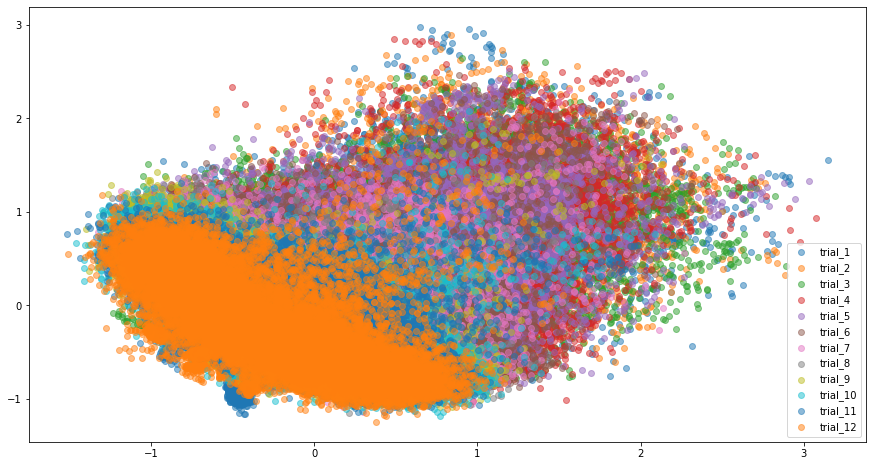

In [104]:
nb_samples_in_frame = 25200
nb_trails = 12

fig, ax = plt.subplots(figsize = (15,8))
ytick = []
for i in np.arange(nb_trails):
    start_id = i*nb_samples_in_frame
    plt.scatter(X_new[start_id:start_id+nb_smpl_frame,0], X_new[start_id:start_id+nb_smpl_frame,1], alpha = 0.5) 
    
labels = ['trial_' + str(i+1) for i in range(12)]
ax.legend(labels)

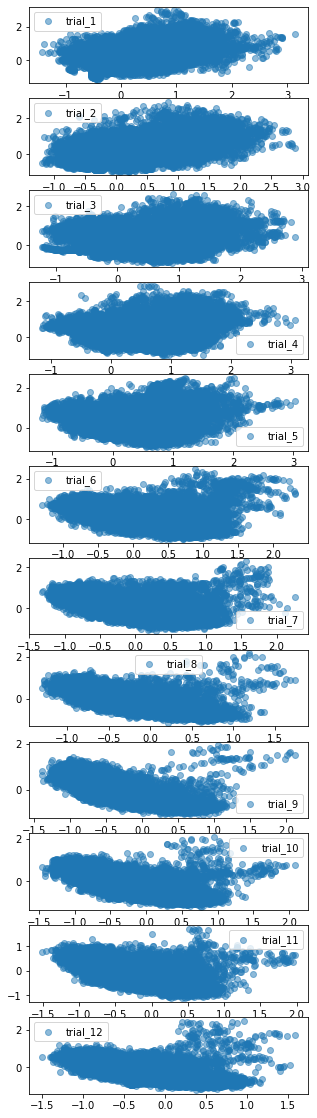

In [106]:
nb_samples_in_frame = 25200
nb_trials = 12

fig, ax = plt.subplots(nrows = nb_trials, ncols = 1, figsize = (5,20))
ax.ravel
ytick = []
for i in np.arange(nb_trails):
    start_id = i*nb_samples_in_frame
    ax[i].scatter(X_new[start_id:start_id+nb_smpl_frame,0], X_new[start_id:start_id+nb_smpl_frame,1], alpha = 0.5) 
    
    labels = ['trial_' + str(i+1)]
    #ax[i].set_xlim([0.001,0.0021])
    ax[i].legend(labels)

## PCA with added time delayed features, on all joint-angles. Labeled by behaviour

In [111]:
#PCA with added time delayed features
#time as samples and joint angles+delay as features.
#for trial 8
from sklearn.decomposition import PCA 
time_delay = 10
trial_number = 1
# extract only angles
beh_signals_trial_i = beh_df[beh_df.index.get_level_values("Trial")==trial_number]
B = beh_signals_trial_i.iloc[:,2:44]

B_aug = pd.DataFrame()
for i in range(1, time_delay) :
    B_aug = pd.concat([B_aug, B.shift(i)], axis=1, ignore_index=True)
print(np.shape(B[time_delay:]))

#B with time dynamics
B_dyn = pd.concat([B[time_delay:], B_aug[time_delay:]], axis=1, ignore_index=True)
print(np.shape(B_dyn))

pca_dyn= PCA(n_components=3)
B_new= pca_dyn.fit_transform(B_dyn)
print(pca_dyn.explained_variance_ratio_)
print(np.shape(B_new))

(25190, 42)
(25190, 420)
[0.24939859 0.11045912 0.10038418]
(25190, 3)


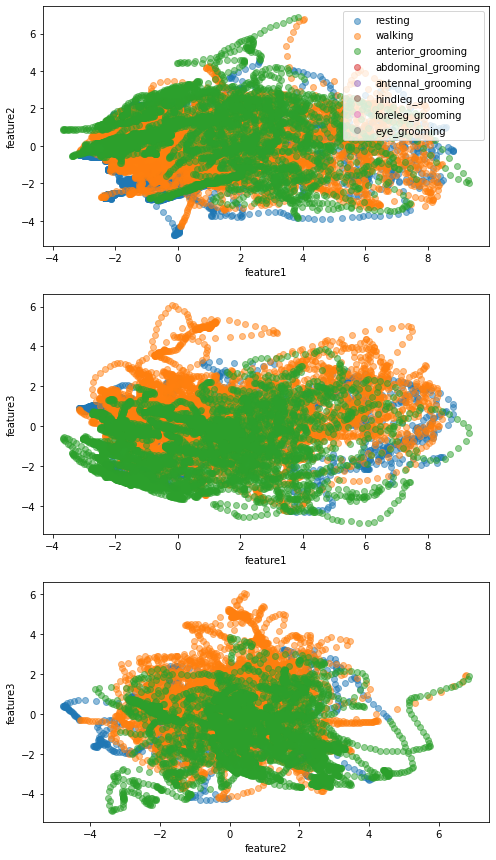

In [109]:
# colour each dot corresponding to its manual label

beh_label = ["resting", "walking", "anterior_grooming", "abdominal_grooming", "antennal_grooming", "hindleg_grooming", "foreleg_grooming", "eye_grooming"]

#remove first 4 lines due to time shift
beh_df_dyn = beh_signals_trial_i.iloc[time_delay:]

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (8,15))

for i in np.arange(len(beh_label)):
    
    select_indices = np.where(beh_df_dyn["Manual"] == beh_label[i])
    #ax[0].scatter(pca_dyn.components_[0][select_indices], pca_dyn.components_[1][select_indices], alpha = 0.5) 
    #ax[1].scatter(pca_dyn.components_[0][select_indices], pca_dyn.components_[2][select_indices], alpha = 0.5) 
    #ax[2].scatter(pca_dyn.components_[1][select_indices], pca_dyn.components_[2][select_indices], alpha = 0.5) 
    ax[0].scatter(B_new[select_indices,0], B_new[select_indices,1], alpha = 0.5) 
    ax[1].scatter(B_new[select_indices,0], B_new[select_indices,2], alpha = 0.5) 
    ax[2].scatter(B_new[select_indices,1], B_new[select_indices,2], alpha = 0.5) 
    
ax[0].set_xlabel('feature' + str(1))
ax[1].set_xlabel('feature' + str(1))
ax[2].set_xlabel('feature' + str(2))

ax[0].set_ylabel('feature' + str(2))
ax[1].set_ylabel('feature' + str(3))
ax[2].set_ylabel('feature' + str(3))
    
ax[0].legend(beh_label)


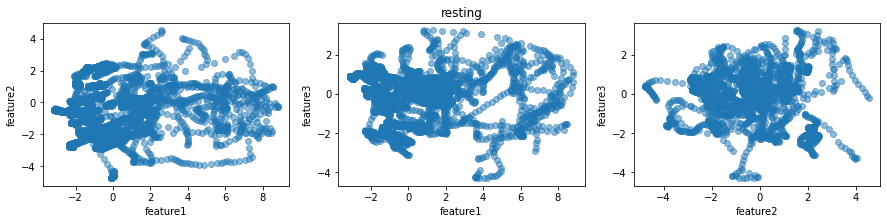

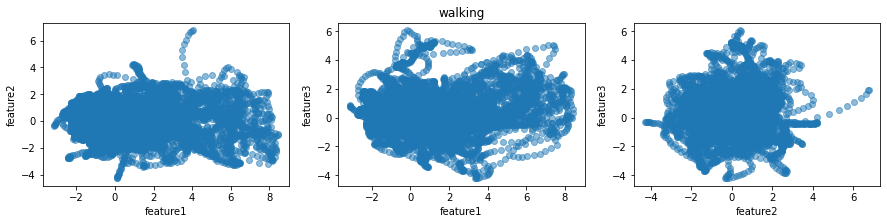

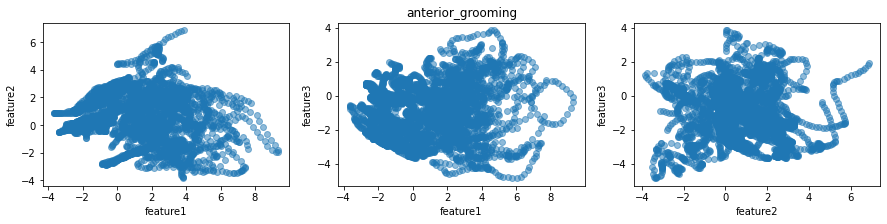

In [110]:
# colour each dot corresponding to its manual label

beh_label = ["resting", "walking", "anterior_grooming", "abdominal_grooming", "antennal_grooming", "hindleg_grooming", "foreleg_grooming", "eye_grooming"]

#remove first 4 lines due to time shift
beh_df_dyn = beh_signals_trial_i.iloc[time_delay:]

for i in np.arange(len(beh_label)):
    select_indices = np.where(beh_df_dyn["Manual"] == beh_label[i])
    #if selected indices not empty
    if np.size(select_indices):
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,3))
        ax[0].scatter(B_new[select_indices,0], B_new[select_indices,1], alpha = 0.5) 
        ax[1].scatter(B_new[select_indices,0], B_new[select_indices,2], alpha = 0.5) 
        ax[2].scatter(B_new[select_indices,1], B_new[select_indices,2], alpha = 0.5) 

        ax[0].set_xlabel('feature' + str(1))
        ax[1].set_xlabel('feature' + str(1))
        ax[2].set_xlabel('feature' + str(2))

        ax[0].set_ylabel('feature' + str(2))
        ax[1].set_ylabel('feature' + str(3))
        ax[2].set_ylabel('feature' + str(3))
        ax[1].set_title(str(beh_label[i]))
    
#labels = ['trial_' + str(i+1) for i in range(12)]
#ax[0].legend(beh_label)


## PCA with added time delayed features, on specific joint-angles. Labelled by behaviour

In [ ]:
# joint-angles important for walking: femur_pitch, tibia_pitch
#PCA with added time delayed features
#time as samples and joint angles+delay as features.
#for trial 8
from sklearn.decomposition import PCA 
time_delay = 10
trial_number = 1
# extract only angles
beh_signals_trial_i = beh_df[beh_df.index.get_level_values("Trial")==trial_number]
B = beh_signals_trial_i.iloc[:,2:44]

B_aug = pd.DataFrame()
for i in range(1, time_delay) :
    B_aug = pd.concat([B_aug, B.shift(i)], axis=1, ignore_index=True)
print(np.shape(B[time_delay:]))

#B with time dynamics
B_dyn = pd.concat([B[time_delay:], B_aug[time_delay:]], axis=1, ignore_index=True)
print(np.shape(B_dyn))

pca_dyn= PCA(n_components=3)
B_new= pca_dyn.fit_transform(B_dyn)
print(pca_dyn.explained_variance_ratio_)
print(np.shape(pca_dyn.components_[0]))


# colour each dot corresponding to its manual label

beh_label = ["resting", "walking", "anterior_grooming", "abdominal_grooming", "antennal_grooming", "hindleg_grooming", "foreleg_grooming", "eye_grooming"]

#remove first 4 lines due to time shift
beh_df_dyn = beh_signals_trial_i.iloc[time_delay:]

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (8,15))

for i in np.arange(len(beh_label)):
    select_indices = np.where(beh_df_dyn["Manual"] == beh_label[i])
    ax[0].scatter(pca_dyn.components_[0][select_indices], pca_dyn.components_[1][select_indices], alpha = 0.5) 
    ax[1].scatter(pca_dyn.components_[0][select_indices], pca_dyn.components_[2][select_indices], alpha = 0.5) 
    ax[2].scatter(pca_dyn.components_[1][select_indices], pca_dyn.components_[2][select_indices], alpha = 0.5) 

ax[0].set_xlabel('feature' + str(1))
ax[1].set_xlabel('feature' + str(1))
ax[2].set_xlabel('feature' + str(2))

ax[0].set_ylabel('feature' + str(2))
ax[1].set_ylabel('feature' + str(3))
ax[2].set_ylabel('feature' + str(3))
    
ax[0].legend(beh_label)



In [111]:
resting = beh_df.loc[beh_df['Manual'] == 'resting']
resting

t           twop_index  \
Date   Genotype Fly Trial Frame                                    
210301 J1xCI9   1   0     0        0.005133 -9223372036854775808   
                          1        0.015100 -9223372036854775808   
                          2        0.025100 -9223372036854775808   
                          3        0.035100 -9223372036854775808   
                          4        0.045100 -9223372036854775808   
...                                     ...                  ...   
                    11    24996  249.811200                 4027   
                          24997  249.821200                 4027   
                          24998  249.831200                 4028   
                          24999  249.841200                 4028   
                          25000  249.851200                 4028   

                                 angle_RF_leg_Coxa_yaw  angle_RF_leg_Coxa  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0                   0.288564           0.406265   
                          1                   0.288564           0.406265   
                          2                   0.358618           0.451284   
                          3                   0.358618           0.451284   
                          4                   0.358618           0.451284   
...                                                ...                ...   
                    11    24996               0.358769           0.444905   
                          24997               0.358769           0.444905   
                          24998               0.358769           0.444905   
                          24999               0.358769           0.444905   
                          25000               0.463316           0.321715   

                                 angle_RF_leg_Coxa_roll  angle_RF_leg_Femur  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0                   -0.484703           -2.437838   
                          1                   -0.501312           -2.448196   
                          2                   -0.489070           -2.514260   
                          3                   -0.514999           -2.504808   
                          4                   -0.497719           -2.494613   
...                                                 ...                 ...   
                    11    24996               -0.588455           -2.641766   
                          24997               -0.588455           -2.641766   
                          24998               -0.711193           -2.702261   
                          24999               -0.709644           -2.775586   
                          25000               -0.672378           -2.873647   

                                 angle_RF_leg_Tibia  angle_RF_leg_Femur_roll  \
Date   Genotype Fly Trial Frame                                                
210301 J1xCI9   1   0     0                2.119772                -0.070825   
                          1                2.097349                -0.089947   
                          2                2.128461                -0.030327   
                          3                2.093834                -0.056415   
                          4                2.116635                -0.038385   
...                                             ...                      ...   
                    11    24996            2.293752                -0.034689   
                          24997            2.372344                -0.035799   
                          24998            2.364601                -0.058636   
                          24999            2.275548                -0.148496   
                          25000            2.056403                -0.386615   

                                 angle_RF_leg_Tarsus  angle_RM_leg_Coxa_yaw  \
Date   

In [ ]:
joints = ['Femur', 'Tibia']
legs = ['angle_RF_leg_', 'angle_RM_leg_', 'angle_LF_leg_Femur', 'angle_LM_leg_Femur' ]
leg_joints = ['angle_RF_leg_' + joint for joint in joints]
beh_signals_trial_i[joint]

## Wavelet transform: behaviour
https://pypi.org/project/behavelet/

https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

In [13]:
from behavelet import wavelet_transform
import numpy as np
from sklearn.decomposition import PCA 

#n_samples = np.size(X,0)
#n_features = np.size(X,1)
def wavelet(data):
    freqs, power, X_new = wavelet_transform(np.array(X), n_freqs=25, fsample=100., fmin=1., fmax=50.)
    
    return X_new
    
#fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(12,5))
#ax.imshow(power, cmap = 'coolwarm', aspect = 'auto')
#ax.set_title(name)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.set_ylabel('Scale')
#ax.set_xlabel('Time')

In [20]:
def PCA_func(data, nb_comp, plot):
    pca= PCA(n_components=nb_comp)
    X_new= pca.fit_transform(data)
    print(pca.explained_variance_ratio_)
    
    if plot:
        fig, ax = plt.subplots(figsize = (15,8))
        #ax.plot(X_new[0:25000])
        #ax.plot(X_new)
        ax.plot(pca.components_[0], label='component 1')
        ax.plot(pca.components_[1], label='component 2')
        ax.plot(pca.components_[2], label='component 3')
    
    return X_new

In [26]:
# plot 3 dimensional data, with color for each label
def plot_3features(data, manual_labels, labels_list):
    fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (8,15))

    for i in np.arange(len(labels_list)):
        select_indices = np.where(manual_labels == labels_list[i])
        ax[0].scatter(data[select_indices,0], data[select_indices,1], alpha = 0.5)  
        ax[1].scatter(data[select_indices,0], data[select_indices,2], alpha = 0.5) 
        ax[2].scatter(data[select_indices,1], data[select_indices,2], alpha = 0.5) 

    ax[0].set_xlabel('feature' + str(1))

    ax[0].set_ylabel('feature' + str(2))

    ax[0].legend(beh_labels[0:3])

(302400, 3)


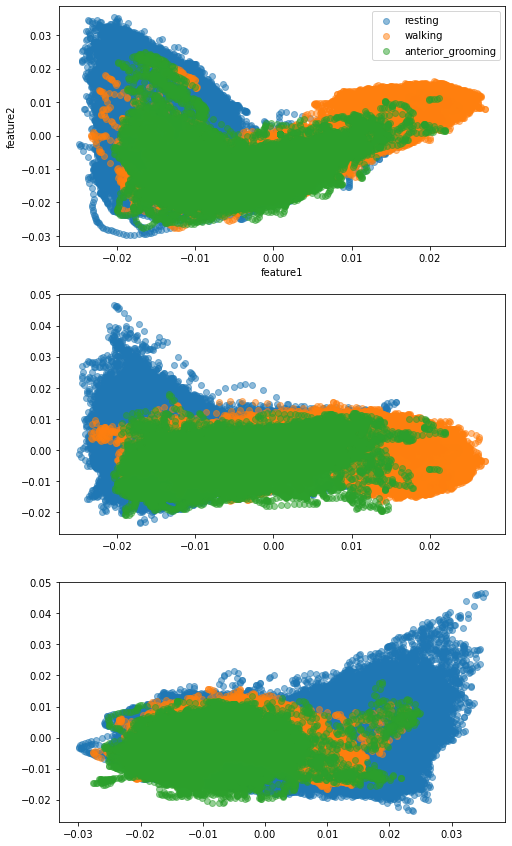

In [27]:
X = beh_df.filter(regex="angle")
manual_labels = beh_df.filter(regex="Manual")

X_wave = wavelet(X)
X_PCA = PCA_func(X_wave, nb_comp=3 , plot= True)
plot_3features(X_PCA, manual_labels, beh_labels)

## Failed trials:

TypeError: Invalid shape (64, 116356, 2) for image data

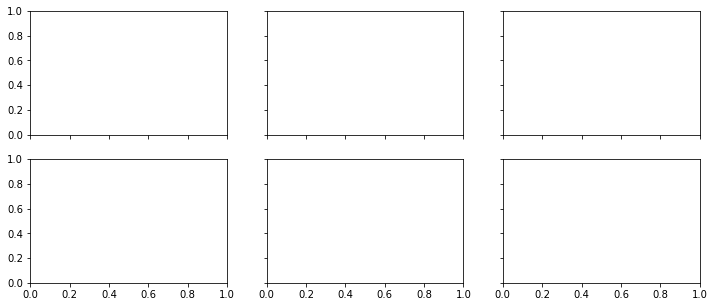

In [118]:
import pywt
# signal : angle name
# label_names: list of labels of behaviour
# sample: 
def plot_cwt_coeffs_per_label(X, label_names, signal, scales, wavelet):
    
    fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12,5))
    
    for ax, name in zip(axs.flat, label_names):
        # apply  PyWavelets continuous wavelet transfromation function
        X_of_label = X.loc[beh_df['Manual'] == name].filter(regex=signal)
        coeffs, freqs = pywt.cwt(X_of_label, scales, wavelet = wavelet)
        # create scalogram
        ax.imshow(coeffs, cmap = 'coolwarm', aspect = 'auto')
        ax.set_title(name)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylabel('Scale')
        ax.set_xlabel('Time')
    plt.tight_layout()


#signal indicies: 0 = body acc x, 1 = body acc y, 2 = body acc z, 3 = body gyro x, 4 = body gyro y, 5 = body gyro z, 6 = total acc x, 7 = total acc y, 8 = total acc z
signal = "angle_RF_leg_Femur" # signal name
scales = np.arange(1, 65) # range of scales
wavelet = 'morl' # mother wavelet

plot_cwt_coeffs_per_label(beh_df, beh_labels, signal, scales, wavelet)
beh_df.filter(regex="angle")

TypeError: Input z must be 2D, not 1D

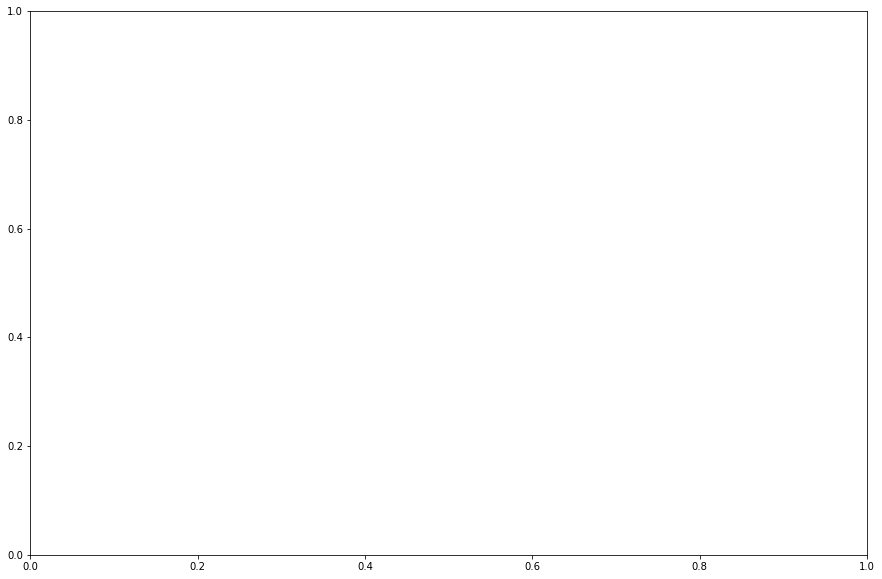

In [4]:
def plot_wavelet(time, signal, scales, 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    freqs, power, X_wave = wavelet_transform(np.array(X), n_freqs=25, fsample=100., fmin=1., fmax=50.)
    period = 1. / freqs
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()

signal = beh_df.filter(regex="angle")
#signal = X.values.squeeze()

scales = np.arange(1, 128)
plot_wavelet(beh_df['t'], signal, scales, 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time')